In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [2]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])


# Normal Distribution
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


In [3]:
dist_01[:,0]

array([ 1.970529  , -0.12094589,  0.60683786,  1.275761  ,  0.70390695,
       -0.26492908,  1.60088483,  1.58984755,  1.79267454,  3.07687387,
        0.54162131,  1.20510395, -0.34453293, -0.17477459,  1.01918578,
        0.5048512 ,  1.57450662,  0.62372867,  1.57595758,  1.89341945,
        1.45415381,  1.27701582,  1.85804108,  2.11272441,  2.08876337,
       -0.4378976 , -1.10105921,  0.43419518,  0.79068698,  3.36292892,
        1.47710913,  0.60349525,  2.01790895, -0.17795368, -1.04176398,
        0.0563918 ,  0.6768264 ,  0.6969151 ,  1.55969756, -0.4329228 ,
        1.01936642,  1.65455059,  1.89655562,  0.12057847, -0.79488305,
       -0.06737373,  0.52492347,  0.61874046,  1.29352071,  0.59888829,
        1.89807425,  0.71719951,  0.41370012,  1.35356012,  1.28403727,
       -0.50416593, -0.0511749 ,  1.16600372,  1.33308518, -0.31139842,
        3.19238802,  2.36586715,  1.77456208,  0.9012783 ,  0.52451491,
       -1.02017846,  1.82635283,  1.51595448,  1.83148944,  1.91

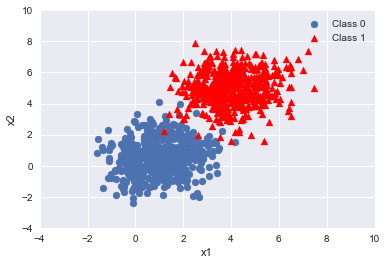

In [4]:
plt.figure(0)
plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-4,10)
plt.ylim(-4,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [5]:
data = np.zeros((1000,3))
print(data.shape)

(1000, 3)


In [6]:
data[:500,:2] = dist_01
data[500:,:2] = dist_02
data[500:,-1] = 1.0

In [7]:
np.random.shuffle(data)
print(data[:10])

[[ 4.31260006  3.95425596  1.        ]
 [ 2.69089977  5.85201585  1.        ]
 [ 0.94750205  0.38458336  0.        ]
 [-0.48909682  0.18390198  0.        ]
 [ 4.25785203  4.41053553  1.        ]
 [ 0.42807817  1.12468226  0.        ]
 [ 1.28403727  0.53986723  0.        ]
 [ 0.46244864  0.89962534  0.        ]
 [ 0.63217896  1.27892351  0.        ]
 [ 4.58951864  4.41881654  1.        ]]


In [8]:
split = int(0.8*data.shape[0])

In [9]:
X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test  = data[split:,-1]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(800, 2) (200, 2)
(800,) (200,)


# Logistic Regression

In [10]:
#hypothesis
def hypothesis(x,w,b):
    #accepts input vector x, input weight vector w and bias b
    return sigmoid(np.dot(x,w)+b)

In [11]:
#sigmoid
def sigmoid(h):
    return 1.0/(1.0+np.exp(-1.0*h))

In [12]:
#error (log likelihood func(LL theta))
def error(x,y,w,b):
    err=0
    for i in range(0,x.shape[0]):
        hx=hypothesis(x[i],w,b)
        err+=np.log2(hx)*y[i]+np.log2(1-hx)*(1-y[i])
    return err/x.shape[0]

In [13]:
# calc grad(update value)
def get_grad(x,y,w,b):
    grad_w=0
    grad_b=0
    m=x.shape[0]
    for i in range(0,m):
        hx=hypothesis(x[i],w,b)
        grad_w+=(y[i]-hx)*x[i]
        grad_b+=y[i]-hx
    return [grad_w/m,grad_b/m]

In [14]:
#gradient asscent
def gradientAscent(x,y,w,b,learningRate=0.01):
    err=error(x,y,w,b)
    [grad_w,grad_b]=get_grad(x,y,w,b)
    w=w+learningRate*grad_w
    b=b+learningRate*grad_b
    return err,w,b

In [16]:
w=2*np.random.random((X_train.shape[1],))
b=5*np.random.random()

In [17]:
def predict(x,w,b):
    p=hypothesis(x,w,b)
    if p>0.5:
        return 1
    else:
        return 0

In [18]:
def get_acc(x_test,y_test,w,b):
    pred=[]
    for i in range(0,x_test.shape[0]):
        p=predict(x_test[i],w,b)
        pred.append(p)
    pred=np.array(pred)
    return float((pred==y_test).sum())/y_test.shape[0] 

In [21]:
loss=[]
accuracy=[]
for i in range(0,1000):
    l,w,b=gradientAscent(X_train,Y_train,w,b,learningRate=0.1)
    accuracy.append(get_acc(X_test,Y_test,w,b))
    loss.append(l)

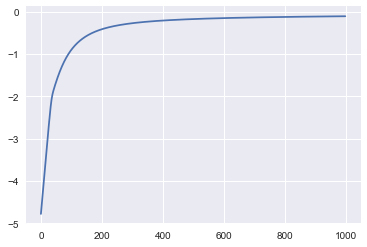

In [25]:
plt.plot(loss)
plt.show()

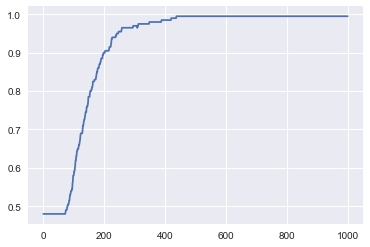

In [24]:
plt.plot(accuracy)
plt.show()

In [47]:
print(w,b)

[0.70813359 1.26959575] -4.731318315198252


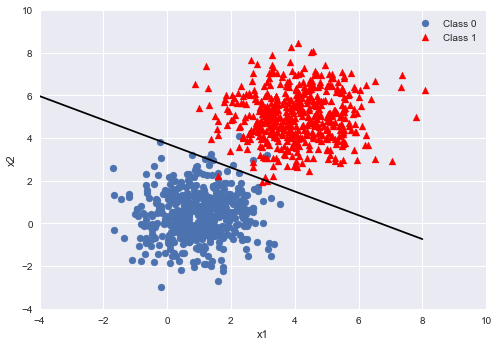

In [49]:
plt.figure(0)
plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-4,10)
plt.ylim(-4,10)
plt.xlabel('x1')
plt.ylabel('x2')

x = np.linspace(-4,8,10)
 y = -(w[0]*x + b)/w[1]
plt.plot(x,y,color='black')
plt.legend()
plt.show()